In [145]:
import pandas as pd
import json as js
import csv
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns
# import scipy

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times New Roman",
})

In [146]:
file_path = 'mtllm_lmql_dspy_comp.csv'
data = pd.read_csv(file_path)
data.set_index('Problem Name', inplace=True)


In [147]:
data_scrubbed = data.drop(columns=['Problem Description','Problem Focus','Desired Output','DSPy LoC', 'MTLLM LoC']).rename(columns={'DSPy Jac LoC':'DSPy'
                                                                                                                                 ,'MTLLM w/o SemStr LoC':'MTLLM'})

In [148]:
LoC = data_scrubbed[['DSPy','LMQL','MTLLM']]
LoC_M = data_scrubbed[['Number of Line Modifeid Lines - DSPY','Number of Lines Modified - MTLLM']]
LoC_M = LoC_M.rename(columns={'Number of Line Modifeid Lines - DSPY':'DSPy','Number of Lines Modified - MTLLM':'MTLLM'})

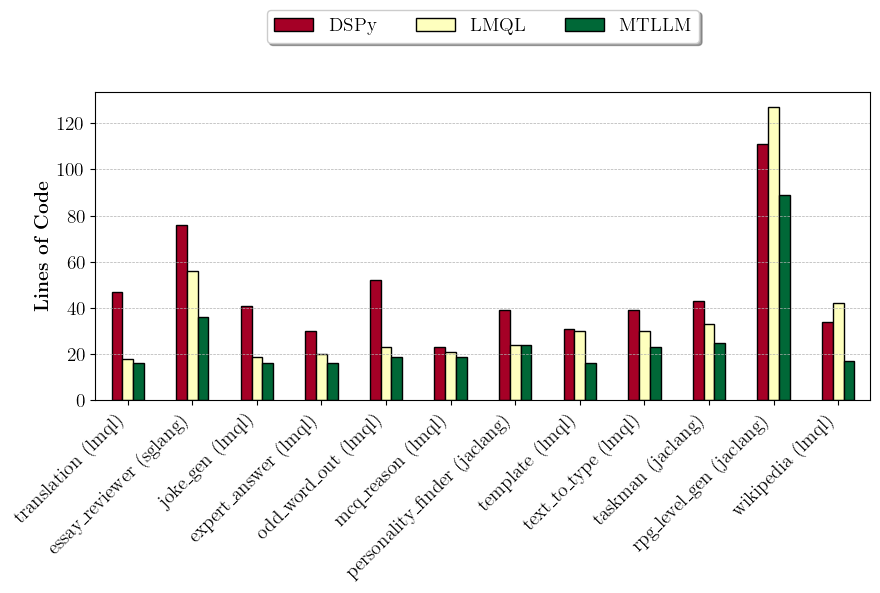

In [149]:
fig, ax = plt.subplots(figsize=(10, 4))

LoC.plot(kind='bar', colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14, ax=ax)
#     axes[i].legend().remove()
ax.set_xticklabels(LoC.index.tolist(), rotation=45, ha='right')
#     axes[i].grid(axis='y',linestyle='--', linewidth=0.5)
#     axes[i].set_ylim(0,65)
ax.set_ylabel(r'\textbf{Lines of Code}', fontsize=14)
ax.set_xlabel('')
ax.legend(fontsize=14, loc='upper center', shadow=True, bbox_to_anchor=(0.5, 1.3), ncol=3)
ax.grid(axis='y',linestyle='--', linewidth=0.5)
# legends = data['Essay Evaluator'].T.keys()
# legends = [legend.replace('Total ', '') for legend in legends]
# # fig.legend(legends, loc='upper center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, 1.13), ncol=2)
# # fig.text(0.5, -0.15, r'\textbf{LLM Programming Framework}', ha='center', va='center',fontsize=12)
# fig.text(0.07, 0.5, r'\textbf{Success Rate}($\%$)', ha='center', va='center', rotation='vertical', fontsize=14)
plt.savefig('LoC.png', dpi=300, bbox_inches='tight')
plt.show()


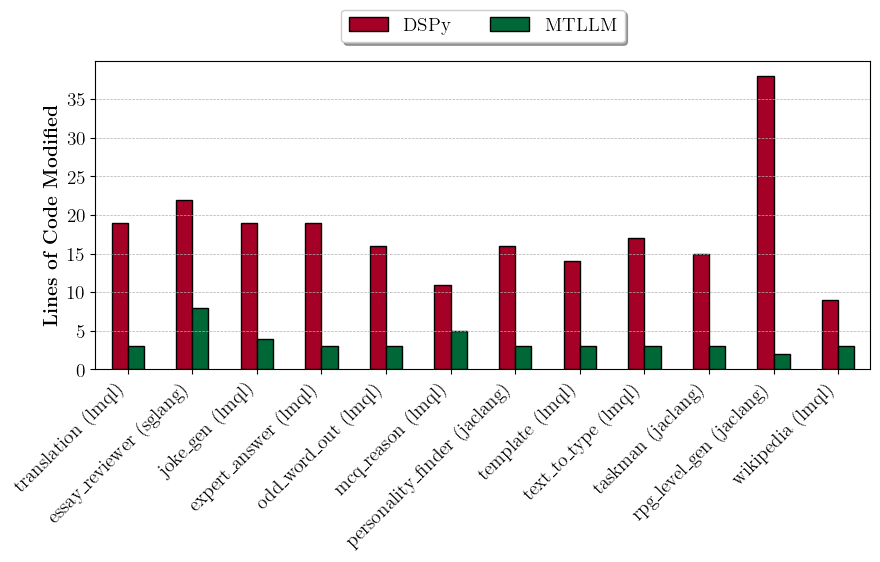

In [150]:
fig, ax = plt.subplots(figsize=(10, 4))

LoC_M.plot(kind='bar', colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14, ax=ax)
#     axes[i].legend().remove()
ax.set_xticklabels(LoC_M.index.tolist(), rotation=45, ha='right')
#     axes[i].grid(axis='y',linestyle='--', linewidth=0.5)
#     axes[i].set_ylim(0,65)
ax.set_ylabel(r'\textbf{Lines of Code Modified}', fontsize=14)
ax.set_xlabel('')
ax.legend(fontsize=14, loc='upper center', shadow=True, bbox_to_anchor=(0.5, 1.2), ncol=3)
ax.grid(axis='y',linestyle='--', linewidth=0.5)
# legends = data['Essay Evaluator'].T.keys()
# legends = [legend.replace('Total ', '') for legend in legends]
# # fig.legend(legends, loc='upper center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, 1.13), ncol=2)
# # fig.text(0.5, -0.15, r'\textbf{LLM Programming Framework}', ha='center', va='center',fontsize=12)
# fig.text(0.07, 0.5, r'\textbf{Success Rate}($\%$)', ha='center', va='center', rotation='vertical', fontsize=14)
plt.savefig('LoC_modified.png', dpi=300, bbox_inches='tight')
plt.show()

In [151]:
LoC_reduction = LoC.copy()
LoC_reduction_DSPy = pd.DataFrame([])
LoC_reduction_DSPy['LMQL'] = LoC_reduction['DSPy'] - LoC_reduction['LMQL']
LoC_reduction_DSPy['MTLLM'] = LoC_reduction['DSPy'] - LoC_reduction['MTLLM']
LoC_reduction_DSPy = LoC_reduction_DSPy.div(LoC_reduction['DSPy'], axis=0) * 100
LoC_reduction_LMQL = pd.DataFrame([])
LoC_reduction_LMQL['DSPy'] = LoC_reduction['LMQL'] - LoC_reduction['DSPy']
LoC_reduction_LMQL['MTLLM'] = LoC_reduction['LMQL'] - LoC_reduction['MTLLM']
LoC_reduction_LMQL = LoC_reduction_LMQL.div(LoC_reduction['LMQL'], axis=0) * 100

/tmp/ipykernel_166376/308322393.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)


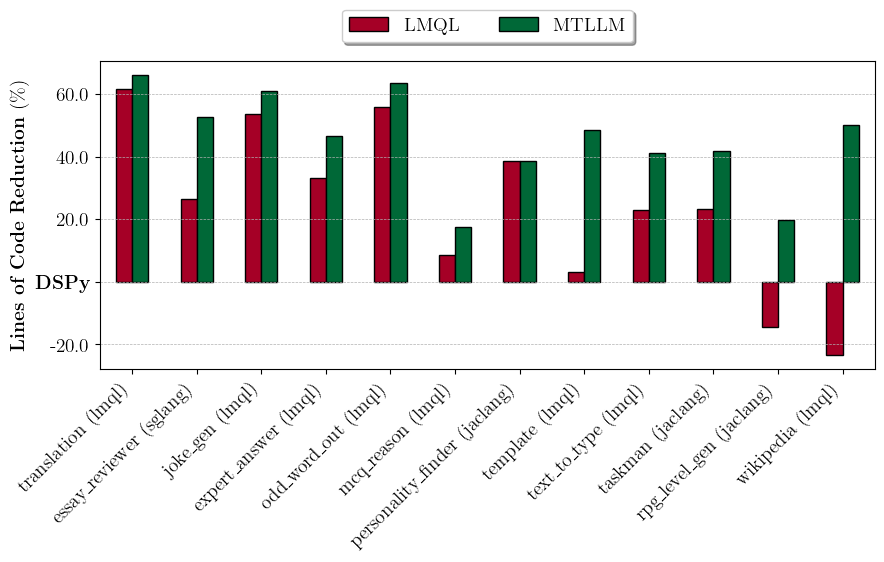

In [152]:
fig, ax = plt.subplots(figsize=(10, 4))

LoC_reduction_DSPy.plot(kind='bar', colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14, ax=ax)
#     axes[i].legend().remove()
ax.set_xticklabels(LoC_reduction_DSPy.index.tolist(), rotation=45, ha='right')
#     axes[i].grid(axis='y',linestyle='--', linewidth=0.5)
#     axes[i].set_ylim(0,65)
ax.set_ylabel(r'\textbf{Lines of Code Reduction} ($\%$)', fontsize=14)
ax.set_xlabel('')
ax.legend(fontsize=14, loc='upper center', shadow=True, bbox_to_anchor=(0.5, 1.2), ncol=3)
ax.grid(axis='y',linestyle='--', linewidth=0.5)
yticks = ax.get_yticks()
ytick_labels = [r'\textbf{DSPy}' if tick == 0 else tick for tick in yticks]
ax.set_yticklabels(ytick_labels)
# legends = data['Essay Evaluator'].T.keys()
# legends = [legend.replace('Total ', '') for legend in legends]
# # fig.legend(legends, loc='upper center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, 1.13), ncol=2)
# # fig.text(0.5, -0.15, r'\textbf{LLM Programming Framework}', ha='center', va='center',fontsize=12)
# fig.text(0.07, 0.5, r'\textbf{Success Rate}($\%$)', ha='center', va='center', rotation='vertical', fontsize=14)
plt.savefig('LoC_Reduction_vs_dspy.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_166376/4072050032.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)


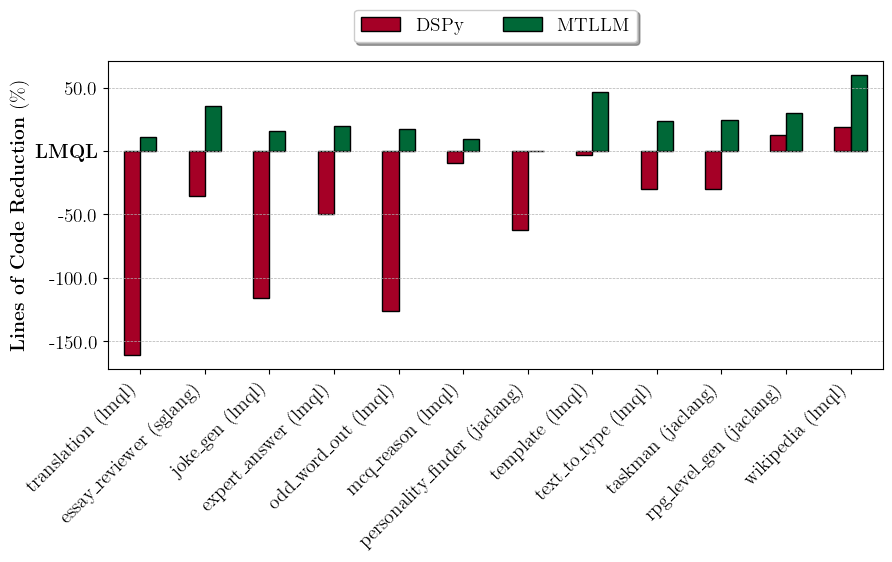

In [153]:
fig, ax = plt.subplots(figsize=(10, 4))

LoC_reduction_LMQL.plot(kind='bar', colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14, ax=ax)
#     axes[i].legend().remove()
ax.set_xticklabels(LoC_reduction_LMQL.index.tolist(), rotation=45, ha='right')
#     axes[i].grid(axis='y',linestyle='--', linewidth=0.5)
#     axes[i].set_ylim(0,65)
ax.set_ylabel(r'\textbf{Lines of Code Reduction} ($\%$)', fontsize=14)
ax.set_xlabel('')
ax.legend(fontsize=14, loc='upper center', shadow=True, bbox_to_anchor=(0.5, 1.2), ncol=3)
ax.grid(axis='y',linestyle='--', linewidth=0.5)
yticks = ax.get_yticks()
ytick_labels = [r'\textbf{LMQL}' if tick == 0 else tick for tick in yticks]
ax.set_yticklabels(ytick_labels)
# legends = data['Essay Evaluator'].T.keys()
# legends = [legend.replace('Total ', '') for legend in legends]
# # fig.legend(legends, loc='upper center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, 1.13), ncol=2)
# # fig.text(0.5, -0.15, r'\textbf{LLM Programming Framework}', ha='center', va='center',fontsize=12)
# fig.text(0.07, 0.5, r'\textbf{Success Rate}($\%$)', ha='center', va='center', rotation='vertical', fontsize=14)
plt.savefig('LoC_Reduction_vs_lmql.png', dpi=300, bbox_inches='tight')
plt.show()